In [1]:
#Installing the repository
#!pip install ucimlrepo

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Importing the Dataset

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
#Concatanating the feature & target values into a single dataframe
df = pd.concat([X, pd.DataFrame(y, columns=['income'])], axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# Data Exploration

In [5]:
df.shape

(48842, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning

## Handling Duplicate Values

In [23]:
#Checking if there are any duplicate values in the dataset
#Displaying duplicate values if there are any
print(df[df.duplicated()])

       age workclass  fnlwgt     education  education-num      marital-status  \
34229   19   Private  130431       5th-6th              3       Never-married   
34415   22   Private  137876  Some-college             10       Never-married   
36713   17   Private  153021          12th              8       Never-married   
38343   21   Private  301694       HS-grad              9       Never-married   
38468   41   Private  116391     Bachelors             13  Married-civ-spouse   
39017   19   Private  139466  Some-college             10       Never-married   
39911   30   Private  111567       HS-grad              9       Never-married   
42386   25   Private  112835     Bachelors             13       Never-married   
43387   23   Private  250630     Bachelors             13       Never-married   
43484   23   Private  239539       HS-grad              9       Never-married   
44307   47   Private  199058  Some-college             10  Married-civ-spouse   
45049   39   Private  184659

Since duplicate values exist, these should be removed.

In [10]:
#Removing the duplicate values
df = df.drop_duplicates()

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [11]:
#Checking for unique values
unique_values = df.nunique()
unique_values

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [12]:
for columns in df:
    print(columns)
    print(df[columns].unique())
    print()  

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'


In [13]:
#Creating a copy of the dataframe since changes cannot be directly applied
df = df.copy()

## Handling unncessary symbols in values

In [14]:
#Removing the punctuation mark (".") in the income field
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.replace(".","")

## Removing unncessary blank spaces in values

In [16]:
#Removing the blank spaces in the object values
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.strip(" ")

## Handling Missing Values

In [ ]:
#Replacing question mark symbols ('?') with 'NaN'
df.replace('?', pd.NA, inplace=True)

In [ ]:
# Impute missing values with the most frequent value (mode) for categorical features
for col in ['workclass', 'occupation', 'native-country', 'education']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Impute missing values with the median for numerical features # Impute missing values with the median for numerical features   
for col in ['education-num', 'age']:
    df[col].fillna(df[col].median(), inplace=True)

In [17]:
#Removing the 'NaN' values
df.dropna(inplace=True)

In [18]:
#Checking null values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
category_counts = df.apply(lambda x: x.nunique())

print("Number of categories in each column:")
print(category_counts)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45194 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45194 non-null  int64 
 1   workclass       45194 non-null  object
 2   fnlwgt          45194 non-null  int64 
 3   education       45194 non-null  object
 4   education-num   45194 non-null  int64 
 5   marital-status  45194 non-null  object
 6   occupation      45194 non-null  object
 7   relationship    45194 non-null  object
 8   race            45194 non-null  object
 9   sex             45194 non-null  object
 10  capital-gain    45194 non-null  int64 
 11  capital-loss    45194 non-null  int64 
 12  hours-per-week  45194 non-null  int64 
 13  native-country  45194 non-null  object
 14  income          45194 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [22]:
for columns in df:
    print(columns)
    print(df[columns].unique())
    print()  

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Data Visualization

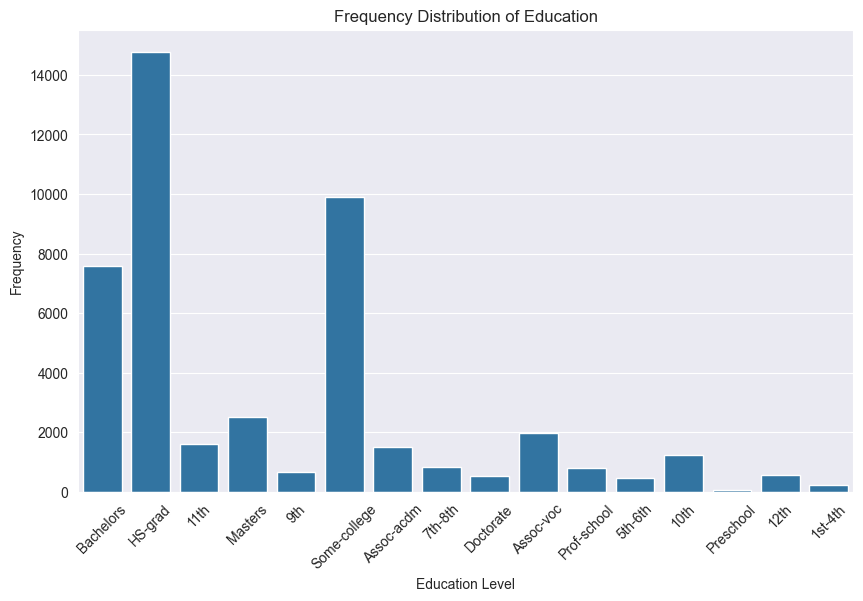

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar plots for selected categorical features
plt.figure(figsize=(10, 6))

# Example: Plotting frequency distribution of 'education' feature
sns.countplot(x='education', data=df)
plt.xticks(rotation=45)  # Angle x-axis labels for better readability
plt.title('Frequency Distribution of Education')
plt.xlabel('Education Level')   
plt.ylabel('Frequency')
plt.show()

In [31]:
#getting the count for each education category
Education_data=df['education'].value_counts()
order1= list(Education_data.index)

EducationNum_data=df['education-num'].value_counts()
order2= list(EducationNum_data.index)

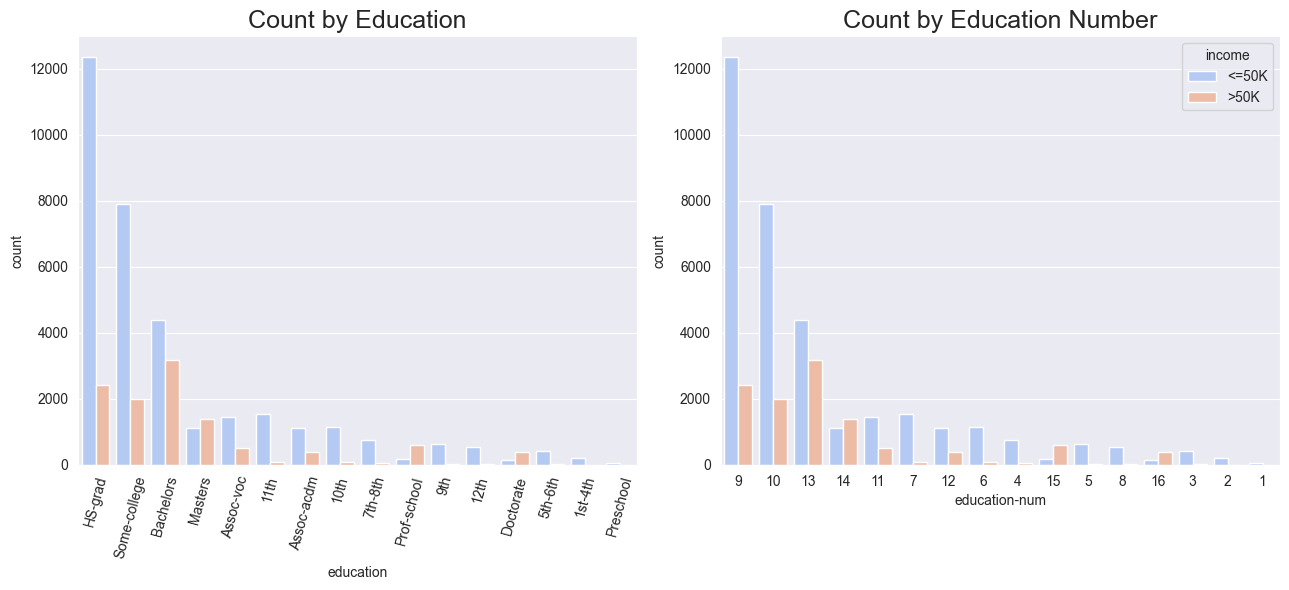

In [32]:
# Plotting the count bar plots
plt.figure(figsize=(13, 6))

# Plot for the first subplot
plt.subplot(1, 2, 1)
plot1 = sns.countplot(data=df, x='education', hue='income', order=order1, palette='coolwarm', hue_order=['<=50K', '>50K'])
plt.title('Count by Education', fontsize=18)
plt.xticks(rotation=75)

# Plot for the second subplot
plt.subplot(1, 2, 2)
plot2 = sns.countplot(data=df, x='education-num', hue='income', order=order2, palette='coolwarm', hue_order=['<=50K', '>50K'])
plt.title('Count by Education Number', fontsize=18)

# Remove the legend for the first subplot
plot1.legend_.remove()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
df.drop('education', axis=1, inplace=True)

## Handling Outliers

### Outliers in the 'age' feature

In [ ]:
#Displaying the 'age' feature in a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'])
plt.title('Box plot - age data')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

In [ ]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = df['age'][df['age'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

In [ ]:
# Visualizing the Data of people above age 75
above75_high_income = df[(df['age'] >= 75) & (df['income'] == '>50K')]['age'].value_counts()
above75_low_income = df[(df['age'] >= 75) & (df['income'] == '<=50K')]['age'].value_counts()
print(f'people who earn more than 50k and above the age 75:- {above75_high_income.sum()}')
print(f'people who earn below 50k and above the age 75:- {above75_low_income.sum()}')

In [ ]:
# Let's check how people will earn throughout the aging with KDE (Kernal Density Estimation)
above50k_earn = df[df['income'] == '>50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn more than 50k throughout the ages")
sns.histplot(above50k_earn,kde=True, label=column)

below50k_earn = df[df['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn less than 50k throughout the ages")
sns.histplot(below50k_earn,kde=True, label=column)

In [ ]:
# Let's drop the outliers of the people who earn more than 50K and see the distribution as well as the boxplot
df = df.drop(df[(df['age'] >= 75) & (df['income'] == '>50K')].index)

# Distribution
above50k_earn = df[df['income'] == '>50K']['age']
plt.figure(figsize=(28, 6))
plt.title("people who earn more than 50k throughout out the ages")
sns.histplot(above50k_earn,kde=True, label=column)

In [ ]:
df = df.drop(df[(df['age'] >= 75) & (df['income'] == '<=50K')].index)
below50k_earn = df[df['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn less than 50k throughout the ages")
sns.histplot(below50k_earn,kde=True, label=column)

In [ ]:
# Boxplot after cleaning the outliers
# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

### Outliers in the 'fnlwgt' (Final Weight) feature

In [ ]:
# Boxplot to see outliers of the final weight column
# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(df['fnlwgt'])
plt.title('Box plot - Final Weight data')
plt.xlabel('Final Weight')
plt.ylabel('Values')
plt.show()

In [ ]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = df['fnlwgt'][df['fnlwgt'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

# Number of records upper the bound of the dataset\
fnlwgt_outliers = df[df['fnlwgt'] >= 417419].value_counts().sum()
print(f'number of outliers :- {fnlwgt_outliers}')

In [ ]:
# Removing the final weight outliers
adult_dataset = df.drop(df[df['fnlwgt'] >= 417419].index)

In [ ]:
# Boxplot to see outliers of the final weight column
# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['fnlwgt'])
plt.title('Box plot of final weight data')
plt.xlabel('final weight')
plt.ylabel('Values')
plt.show()

### Outliers in the 'hours-per-week' feature

In [ ]:
# Create a box plot for working hours feature
plt.figure(figsize=(8, 6))
plt.boxplot(df['hours-per-week'])
plt.title('Box plot - working hours data')
plt.xlabel('hours-per-week')
plt.ylabel('Values')
plt.show()

## Encoding Lables

In [ ]:
#Defining the categorical columns to be encoded
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','income']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Splitting of Data

In [ ]:
# Split data into features and target
X = df.drop('income', axis=1)
y = df['income']

from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap with contrasting colors
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Model Training

In [ ]:
# Step 2: Model Training
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
#Step 3: Model Evaluation
# Evaluate Naïve Bayes model
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Naïve Bayes Classification Report:\n", classification_report(y_test, nb_pred))
print("Naïve Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

In [ ]:
# Evaluate Random Forest model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

In [ ]:
# Step 4: Model Comparison
print("\nModel Comparison:")
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

## Applying the Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df.drop(columns=["income"]))

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to capture 95% of variance :", num_components)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x= num_components, color='r', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns

correlation = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=9)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(df = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9'])

In [ ]:
principal_Df.head()

In [ ]:
# X = df[["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
#            "occupation", "relationship", "race", "sex", 
#            "hours-per-week"]]
# y =  df["income"]

In [ ]:
X = principal_Df
y = df["income"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [ ]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate models
print("Naïve Bayes Model:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

print("\nRandom Forest Model:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

In [ ]:
df["income"].value_counts()